**You can download the dataset for the use case from [Kaggle](https://www.kaggle.com/c/fake-news/data).**

# **Introduction**

* The epidemic spread of fake news is a side effect of the expansion of social networks to circulate news, in contrast to traditional mass media such as newspapers, magazines, radio, and television. Human inefficiency to distinguish between true and false facts exposes fake news as a threat to logical truth, democracy, journalism, and credibility in government institutions. 

* The veracity of information is an essential part of its integrity. The combat against fake news makes indissoluble the integrity and veracity checking of social networks' information and data consumption in the application layer. The disclosure of fake content implies a waste of processing and network resources. Further, it consists of a serious threat to the information integrity and credibility of the provided service. Hence, the sharing of untrue information concerns the Quality of Trust (QoT) applied to the news dissemination, referring to how much a user trusts the content of a particular source.

# **Business Problem**

* ***To develop a machine learning program to identify when an article might be fake news.***

# **Data Understanding**


* What is fake news? - The fake news term originally refers to false and often sensationalist information disseminated under the guise of relevant news. However, this term's use has evolved and is now considered synonymous with the spread of false information on social media. It is noteworthy that, according to Google Trends, the "fake news" term reached significant popularity in 2017.

* ***Fake news is defined as news that is intentionally and demonstrably false, or as any information presented as news that is factually incorrect and designed to mislead the news consumer into believing it to be true.***

# **Let's Begin**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# importing data

df = pd.read_csv(r"/content/train.csv",error_bad_lines=False)

# Do note that error_bad_lines=False will cause the offending lines to be skipped.

#### *What is the dimension of the data?*

In [ ]:
df.shape

(20800, 5)

#### *How data looks like?*

In [ ]:
# first 10 lines of the data
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


#### *What are the columns in the dataset?*

In [ ]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# **Basic Exploratory Data Analysis**

## **Missing Values**

#### *How many missing values are present in the dataset?*

In [ ]:
pd.DataFrame(df.isnull().sum(),columns=['Count of missing values'])

,Count of missing values
id,0
title,558
author,1957
text,39
label,0


In [ ]:
# Percentage of missing values  

pd.DataFrame(round(df.isnull().sum()*100/df.shape[0],2),columns=['Percentage of missing values'])

,Percentage of missing values
id,0.00
title,2.68
author,9.41
text,0.19
label,0.00


#### *How to deal with the missing data?*

In [ ]:
# Percentage of missing values is less hence dropping those missing rows

df.dropna(inplace=True)
df.shape
# df = df.dropna()

(18285, 5)

In [ ]:
df.reset_index(inplace=False,drop=True)  #resetting the index after dropping missing rows
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


## Word Clouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from os import path
import matplotlib.pyplot as plt

df_unreliable = df[df['label'] == 1]
df_reliable = df[df['label'] == 0]


Word Cloud for Authors of Fake news articles:


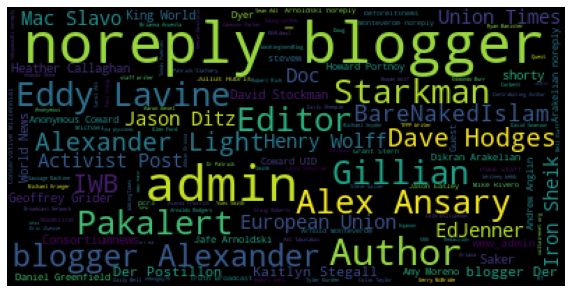

In [ ]:
textp_w = df_unreliable['author']
stopwords = set(STOPWORDS)

print ("Word Cloud for Authors of Fake news articles:")
wordcloud = WordCloud().generate(' '.join(textp_w))
plt.figure(figsize=(10,10))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Word Cloud for Authors of Reliable news articles:


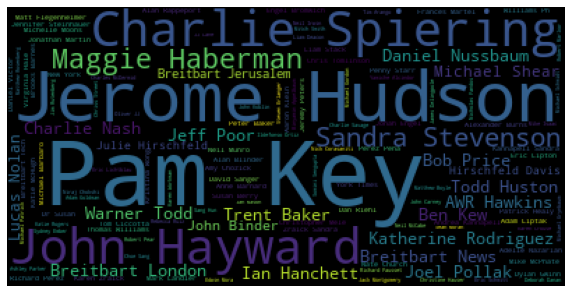

In [ ]:
textp_w = df_reliable['author']
stopwords = set(STOPWORDS)

print ("Word Cloud for Authors of Reliable news articles:")
wordcloud = WordCloud().generate(' '.join(textp_w))
plt.figure(figsize=(10,10))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Label Distribution (Data Imbalance)**

In [ ]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

1 : Unreliable or fake
0 : Reliable

Distribution of labels is:
0    10361
1     7924
Name: label, dtype: int64


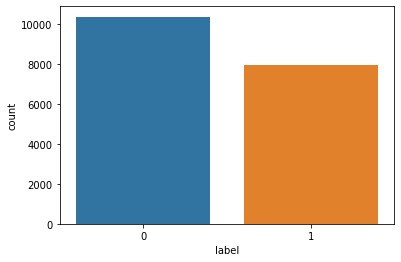

In [ ]:
import seaborn as sns

sns.countplot(x = df['label']);
print("1 : Unreliable or fake")
print("0 : Reliable")

print("\nDistribution of labels is:")
print(df.label.value_counts());


In [ ]:
print(round(df.label.value_counts(normalize=True),2)*100);

0    57.0
1    43.0
Name: label, dtype: float64


In [ ]:
# following code if using Google colab
from google.colab import files
df.to_csv('train_part_1.csv') 
files.download('train_part_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# End of Part-1!